# wavelet transform

- 동적신호를 분석할 때 fft대신 더 적절하게 사용할 수 있다.
- wavelet transform을 이해하기 위해서는 신호처리, 푸리에 변환 및 수학에 대한 사전지식이 필요하다.
- fft를 작동하는 것을 먼저 본 후에 wavelet transform 작동을 확인한다.

- 푸리에 변환은 시간 영역에서 해상도가 0이다.

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

/home/chan/.pyenv/versions/3.6.8/envs/study/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


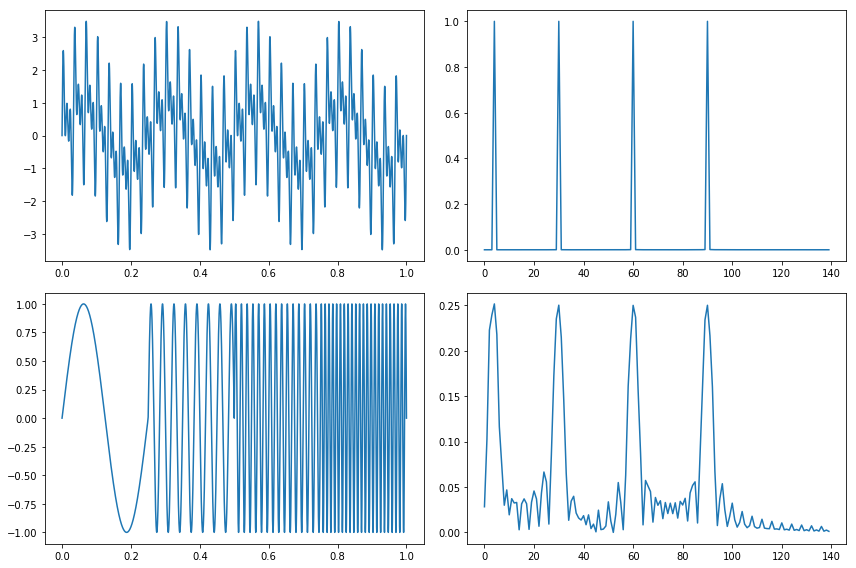

In [11]:
t_n = 1
N = 100000
T = t_n / N
f_s = 1/T
 
xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=N/4)
 
frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)
 
composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])
 
f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)
 
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, composite_signal2)
axarr[0,1].plot(f_values1[:140], fft_values1[:140])
axarr[1,1].plot(f_values2[:140], fft_values2[:140])

plt.tight_layout()
plt.show()

- 상단 그림은 4개의 다른 주파수를 포함
- 하단 그림은 다른 시간에 4개의 다른 주파수를 포함
- 두 주파수 스펙트럼이 정확하게 동일한 4개의 피크를 포함하므로 신호에서 이들 주파수가 어디에 있는지 알 수는 없음. 
- 푸리에 변환은 처음 두 신호를 구별 할 수 없음
- 이를 극복하기 위해 STFT 개발(슬라이딩 윈도우 사용)
- 이보다 더 좋은 방법이 wavelet transform

![각 transform의 피쳐](http://ataspinar.com/wp-content/uploads/2018/08/Comparisonoftransformations.jpg)

- 블록의 크기와 방향은 시간과 주파수 영역에서 구별 할 수 있는 특징이 얼마나 작은지를 나타냄.
- 시간 영역에서는 매우 작은 특징을 구별 할 수 있고 주파수 영역에서 특징을 구분할 수 없음.
- 푸리에 변환은 주파수 영역에서 높은 분해능력을, 시간 영역에서는 분해능력이 0.
- STFT는 둘다 중간 크기의 분해능력 가능
- wavelet transform은
    - 작은 주파수 값의 경우 주파수 영역에서 높은 해상도, 시간 영역에서 낮은 해상도,
    - 큰 주파수 값의 경우 주파수 도메인에서의 낮은 해상도, 시간 도메인에서의 높은 해상도.
- 즉, 좀 더 유연하게 분석 가능

## Wavelet Transform의 작동 원리

- wavelet은 일련의 함수를 사용하며 각각 다른 스케일을 사용
- wavelet이라는 단어는 작은 웨이브를 나타냄

![](http://ataspinar.com/wp-content/uploads/2018/07/Wavelet-Out1.jpg)



In [12]:
import pywt
print(pywt.families(short=False))
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 
'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 
'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

/home/chan/.pyenv/versions/3.6.8/envs/study/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


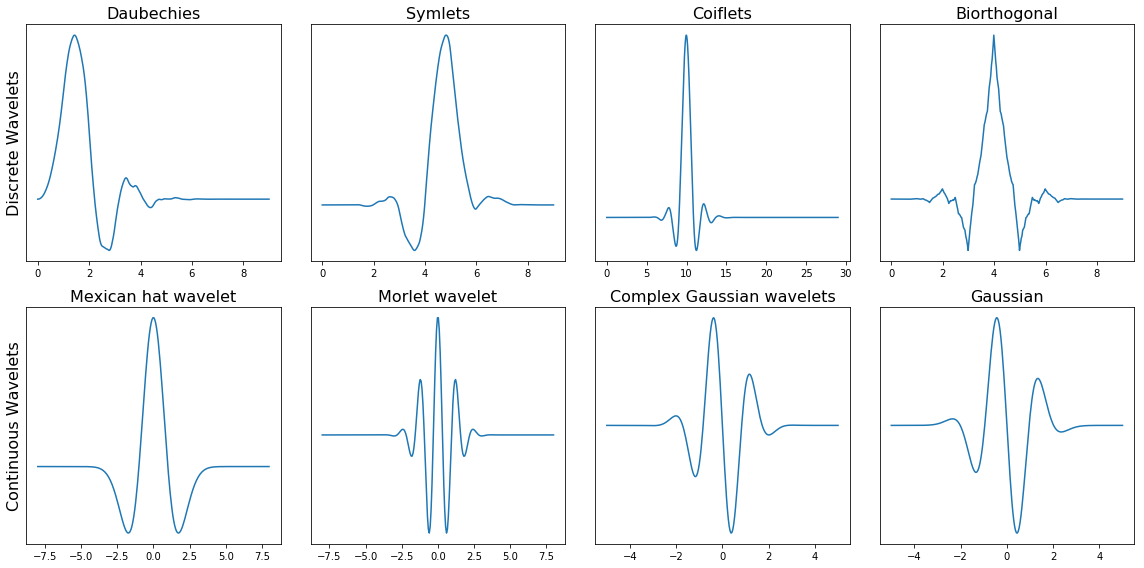

In [13]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()